In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sys.path.append("..")
sys.path.append("../src")
import os
import pickle as pkl
from copy import deepcopy

# import models
from math import ceil
from os.path import join as oj

import config
import data

# from style import *
import dvu
import numpy as np
import outcomes
import pandas as pd

# from style import *
import viz
from viz import *

outcome_def = (
    "y_consec_thresh"  # don't change, since weve already selected some good events
)

# load normal + mutant daa

In [2]:
# df = data.get_data(use_processed=True) #, dset='orig') # all_data=True
df = data.get_data(dset="vps4_snf7")
df = outcomes.add_aux_dyn_outcome(df)
# dfv = df[~(df.short | df.long | df.hotspots)]
# dfv = dfv[dfv.lifetime > 15] # only keep hard tracks
# dfv = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots

print(f"Data was collected at {len(df['X'].iloc[1]) / df.lifetime.iloc[1]} Hz")

Data was collected at 1.1904761904761905 Hz


In [3]:
df.keys()

Index(['lifetime', 'cell_num', 'catIdx', 't', 'lifetime_s',
       'mean_total_displacement', 'mean_square_displacement', 'x_pos_seq',
       'y_pos_seq', 'x_pos', 'y_pos', 'z_pos_seq', 'z_pos', 'X_pvals',
       'X_extended', 'X_pvals_extended', 'X', 'X_c_extended', 'X_std_extended',
       'X_sigma_extended', 'X_starts', 'X_ends', 'Y_pvals', 'Y_extended',
       'Y_pvals_extended', 'Y', 'Y_c_extended', 'Y_std_extended',
       'Y_sigma_extended', 'Y_starts', 'Y_ends', 'lifetime_extended', 'pid',
       'valid', 'X_max', 'X_max_extended', 'X_min', 'X_mean', 'X_std', 'Y_max',
       'Y_mean', 'Y_std', 'X_peak_idx', 'Y_peak_idx', 'X_peak_time_frac',
       'X_peak_last_15', 'X_peak_last_5', 'rise', 'fall', 'rise_extended',
       'fall_extended', 'fall_late_extended', 'rise_slope', 'fall_slope',
       'rise_local_3', 'fall_local_3', 'rise_local_11', 'fall_local_11',
       'max_diff', 'min_diff', 'y_score', 'y_thresh', 'y', 'y_num_sig',
       'y_single_sig', 'y_double_sig', 'y_conserv

In [6]:
df_mutant = data.get_data(dset="vps4_snf7___key=mt")
df_mutant = outcomes.add_aux_dyn_outcome(df_mutant)
# dfv = df[~(df.short | df.long | df.hotspots)]
# dfv = dfv[dfv.lifetime > 15] # only keep hard tracks
# dfv = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots

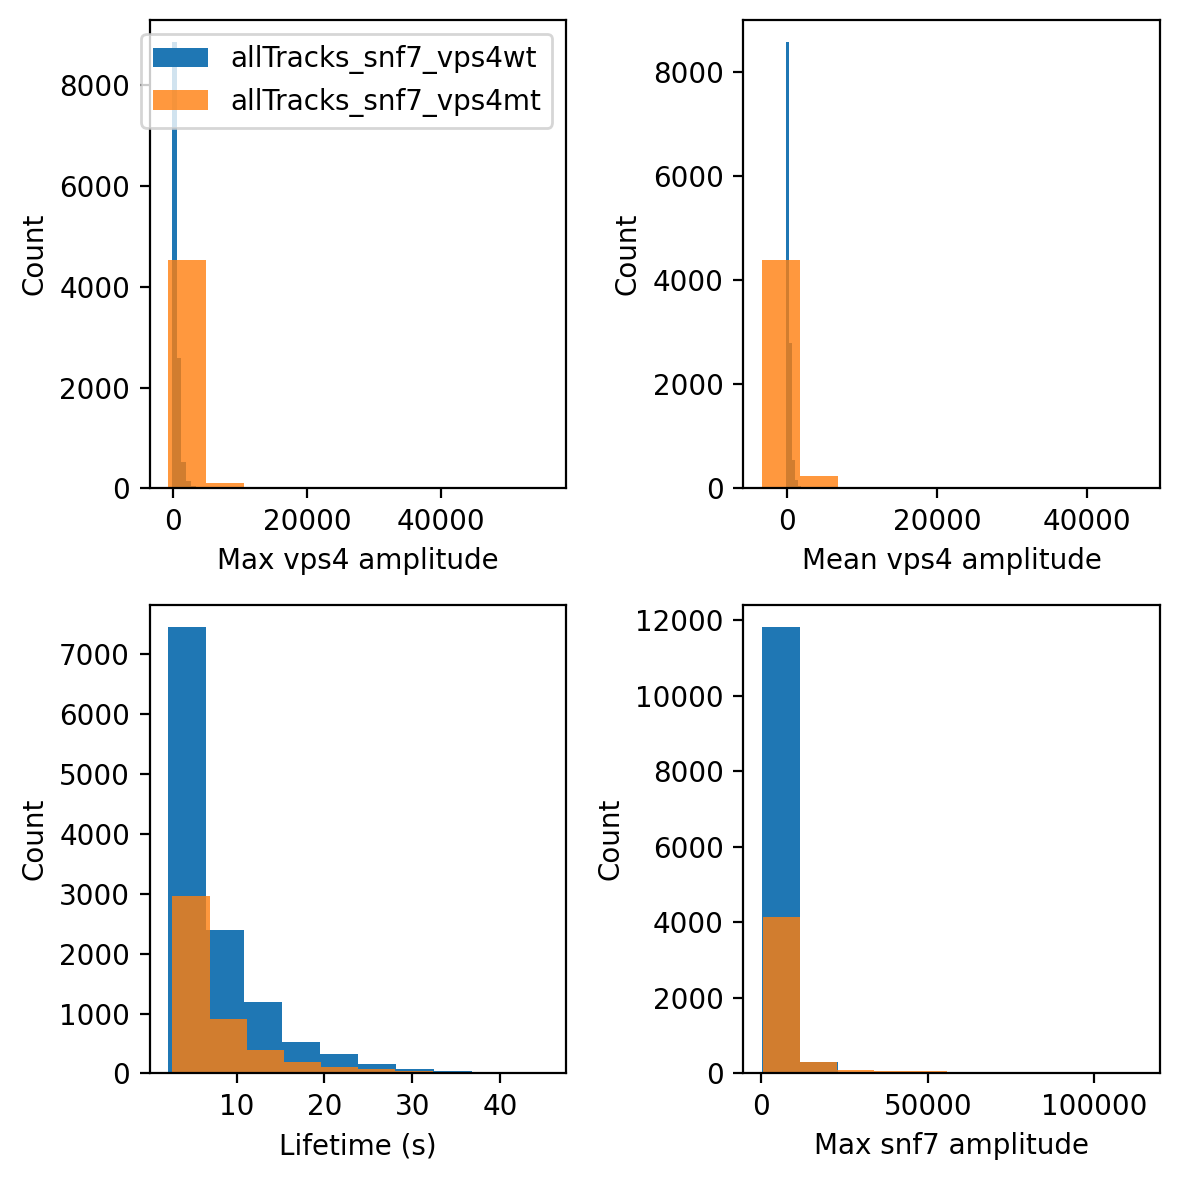

In [9]:
R, C = 2, 2
plt.figure(figsize=(6, 6), dpi=200)
plt.subplot(R, C, 1)
plt.hist(df["Y_max"], label="allTracks_snf7_vps4wt")
plt.hist(df_mutant["Y_max"], label="allTracks_snf7_vps4mt", alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Max vps4 amplitude")
plt.legend()

plt.subplot(R, C, 2)
plt.hist(df["Y_mean"], label="allTracks_snf7_vps4wt")
plt.hist(df_mutant["Y_mean"], label="allTracks_snf7_vps4mt", alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Mean vps4 amplitude")

plt.subplot(R, C, 3)
plt.hist(df["lifetime_s"])
plt.hist(df_mutant["lifetime_s"], alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Lifetime (s)")


plt.subplot(R, C, 4)
plt.hist(df["X_max"], label="allTracks_snf7_vps4wt")
plt.hist(df_mutant["X_max"], label="allTracks_snf7_vps4mt", alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Max snf7 amplitude")

plt.tight_layout()
plt.show()

# look at random examples

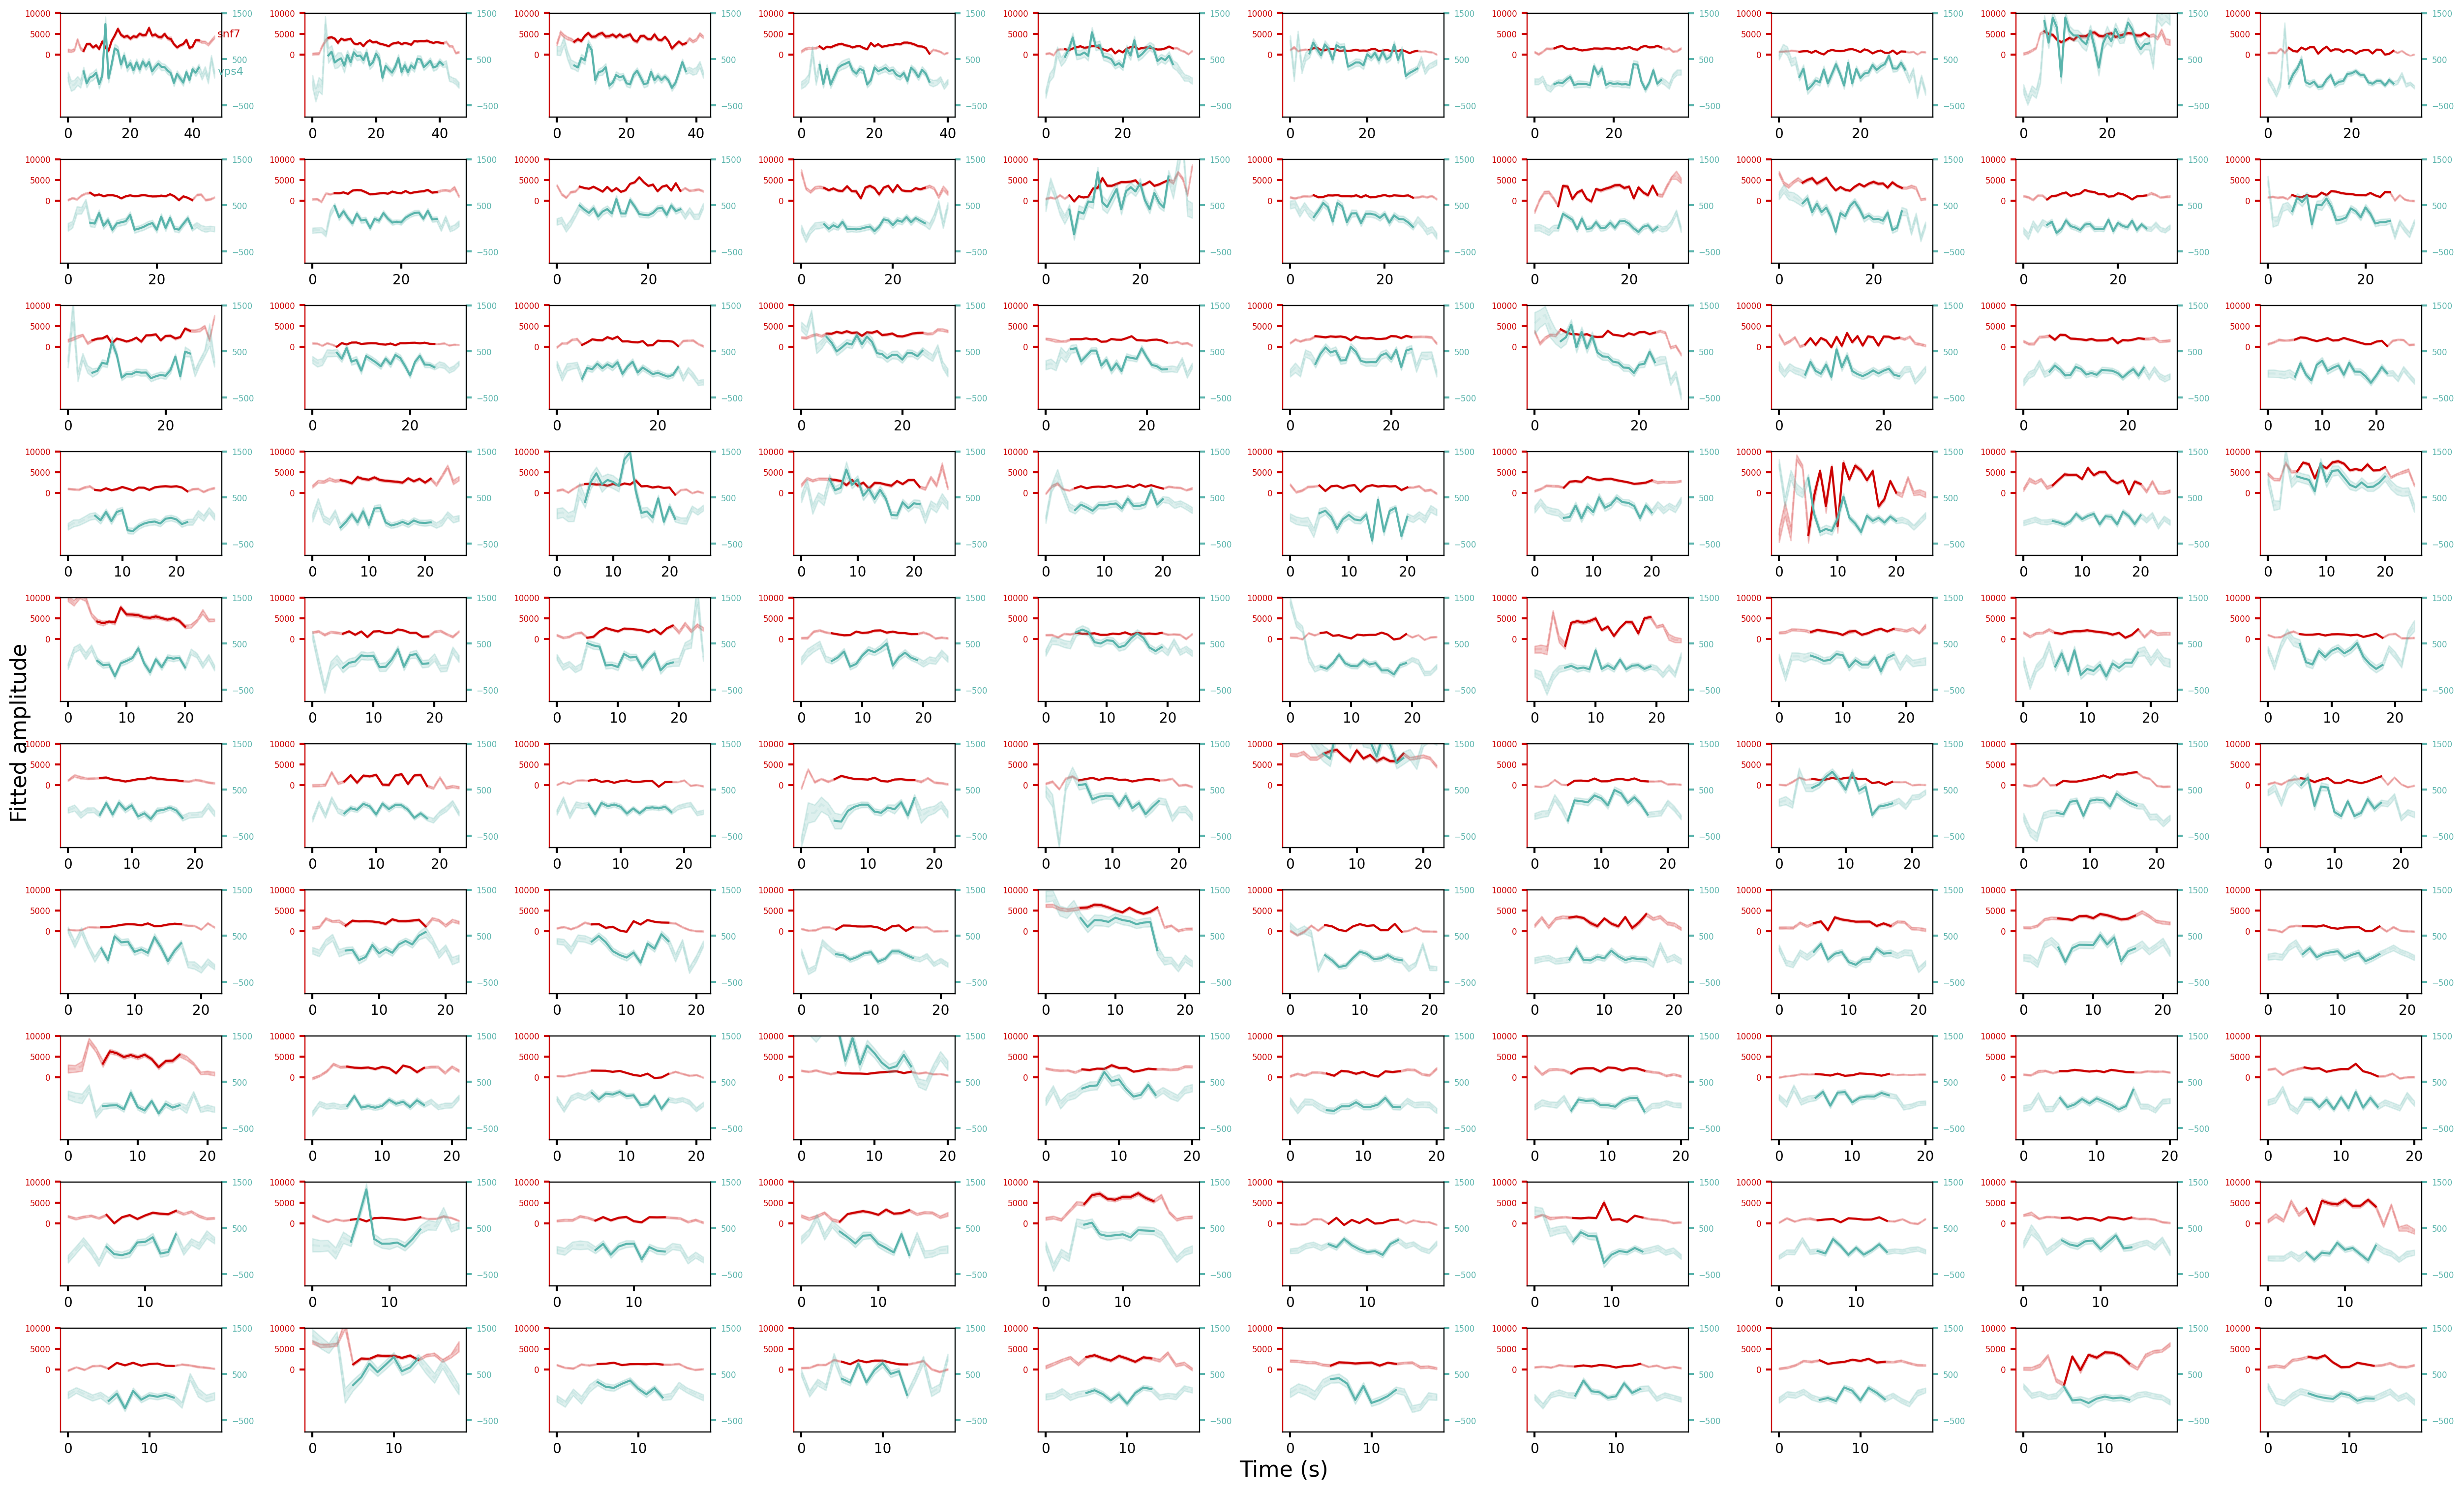

In [4]:
d = df
fig = plt.figure(figsize=(25, 15), dpi=200, facecolor="w")
viz.plot_curves(
    d,
    R=10,
    C=10,
    hline=False,
    xlim_constant=False,
    ylim_constant=True,
    num_axes=2,
    xlim=(0, 55),
    ylim_cla=(-500, 7500),
    ylim_aux=(-500, 1500),
    yticks=[0, 5000, 10000],
    clath_lab="snf7",
    aux_lab="vps4",
    legend=False,
    # yticklabels=["$0$", "$10^4$"],
    fig=fig,
)
plt.tight_layout()
fig.text(0, 0.5, "Fitted amplitude", va="center", rotation="vertical", fontsize=16)
fig.text(0.5, 0, "Time (s)", va="center", fontsize=16)
plt.savefig('examples.png')
# viz.savefig('supp_grid')
# plt.show()